Import the necessary python libraries and Susie objects.

In [8]:
%pip install -i https://test.pypi.org/simple/ susie==1.0.3

Looking in indexes: https://test.pypi.org/simple/
You should consider upgrading via the '/Users/maliabarker/Desktop/main/susie/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
from susie.transit_times import TransitTimes
from susie.ephemeris import Ephemeris
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'susie'

Add your transit data to the TransitTimes object.

In [10]:
# STEP 1: Upload data from file
filepath = "./malia_examples/WASP12b_transit_ephemeris.csv"
data = np.genfromtxt(filepath, delimiter=',', names=True)
# STEP 2: Break data up into epochs, mid transit times, and error
epochs = data["epoch"] - np.min(data["epoch"])
mid_transit_times = data["transit_time"] - np.min(data["transit_time"])
mid_transit_times_err = data["sigma_transit_time"]
# NOTE: You can use any method and/or file type to upload your data. Just make sure the resulting variables (epoch, mid transit times, and mid transit time errors) are numpy arrays
# STEP 2.5 (Optional): Make sure the epochs are integers and not floats
epochs = epochs.astype('int')
# STEP 3: Create new transit times object with above data
transit_times_obj1 = TransitTimes(epochs, mid_transit_times, mid_transit_times_err)
# STEP 4 (Optional): To check that the resulting data is correct, you can print each variable and the corresponding data using this command: print(vars(transit_times_obj1))

Create the Ephemeris object and add your TransitTimes object.

In [11]:
ephemeris_obj1 = Ephemeris(transit_times_obj1)

Fit your transit time data to an ephemeris model. You can specify what type of model with the options 'linear' or 'quadratic'.

In [18]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')

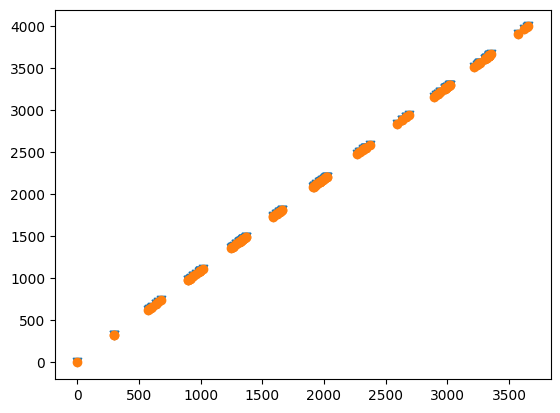

In [19]:
# Show model fit
plt.scatter(x=transit_times_obj1.epochs, y=linear_model_data, marker='v')
plt.scatter(x=transit_times_obj1.epochs, y=transit_times_obj1.mid_transit_times, marker='o')
plt.show()

In [21]:
# Getting a quadratic model will solve for period, conjunction time, and period change by epoch (and their respective errors)
quad_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')

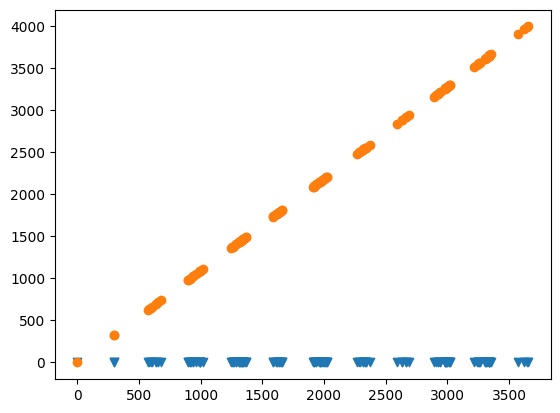

In [23]:
# Show model fit
plt.scatter(x=transit_times_obj1.epochs, y=quad_model_data, marker='v')
plt.scatter(x=transit_times_obj1.epochs, y=transit_times_obj1.mid_transit_times, marker='o')
plt.show()